In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from PIL import Image
import os, glob, numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, Activation
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
caltech_dir = "/content/drive/MyDrive/Colab Notebooks/gender_classification/dataset"
categories = ["man", "woman"]
num_classes = len(categories)

image_w = 128
image_h = 128

pixels = image_h * image_w * 3

X = []
y = []

for idx, category in enumerate(categories):
    
    #one-hot 돌리기.
    label = [0 for i in range(num_classes)]
    label[idx] = 1

    image_dir = caltech_dir + "/" + category
    files = glob.glob(image_dir+"/*.jpg")
    print(category, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        X.append(data)
        y.append(label)

        if i % 700 == 0:
            print(category, " : ", f)

X = np.array(X)
y = np.array(y)
#1 0  이면 man
#0 1  이면 woman 이런식


X_train, X_test, y_train, y_test = train_test_split(X, y)
xy = (X_train, X_test, y_train, y_test)
np.save("/content/drive/MyDrive/Colab Notebooks/gender_classification/dataset/gender_data1.npy", xy)

print("ok", len(y))

man  파일 길이 :  967
man  :  /content/drive/MyDrive/Colab Notebooks/gender_classification/dataset/train/man/image_1007.jpg
man  :  /content/drive/MyDrive/Colab Notebooks/gender_classification/dataset/train/man/image_2000 (115).jpg
woman  파일 길이 :  911
woman  :  /content/drive/MyDrive/Colab Notebooks/gender_classification/dataset/train/woman/image_1006.jpg
woman  :  /content/drive/MyDrive/Colab Notebooks/gender_classification/dataset/train/woman/image_931.jpg


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


ok 1878


In [5]:
categories = ["man", "woman"]
num_classes = len(categories)

#일반화
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [7]:
model = Sequential()
model.add(Conv2D(64, 3, strides= 1, padding='same', input_shape=X_train.shape[1:]))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Conv2D(64, 3, strides= 1, padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(MaxPool2D((2,2), strides=2))

model.add(Conv2D(128, 3, strides=1, padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Conv2D(128, 3, strides=1, padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(MaxPool2D((2, 2), strides=2))

model.add(Conv2D(256, 3, strides=1, padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Conv2D(256, 3, strides=1, padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Conv2D(256, 3, strides=1, padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(MaxPool2D((2, 2), strides=2))

model.add(Conv2D(512, 3, strides=1, padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Conv2D(512, 3, strides=1, padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Conv2D(512, 3, strides=1, padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(MaxPool2D((2, 2), strides=2))
model.add(MaxPool2D((2, 2), strides=2))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 64)      256       
_________________________________________________________________
activation (Activation)      (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 64)      256       
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)       

In [9]:
model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [10]:
history = model.fit(X_train, y_train, 
                    batch_size = 32, 
                    epochs = 100, 
                    verbose = 1,
                    validation_data=(X_test, y_test))

Epoch 1/100
44/44 [==============================] - 52s 403ms/step - loss: 14.2942 - accuracy: 0.4979 - val_loss: 7.9467 - val_accuracy: 0.5532
Epoch 2/100
44/44 [==============================] - 16s 360ms/step - loss: 1.5276 - accuracy: 0.5149 - val_loss: 0.7114 - val_accuracy: 0.6298
Epoch 3/100
44/44 [==============================] - 16s 359ms/step - loss: 1.5451 - accuracy: 0.4893 - val_loss: 1.0672 - val_accuracy: 0.4447
Epoch 4/100
44/44 [==============================] - 16s 359ms/step - loss: 1.3052 - accuracy: 0.5071 - val_loss: 2.3776 - val_accuracy: 0.5638
Epoch 5/100
44/44 [==============================] - 16s 359ms/step - loss: 1.3128 - accuracy: 0.5249 - val_loss: 0.9209 - val_accuracy: 0.5638
Epoch 6/100
44/44 [==============================] - 16s 359ms/step - loss: 1.3244 - accuracy: 0.5263 - val_loss: 0.6751 - val_accuracy: 0.5617
Epoch 7/100
44/44 [==============================] - 16s 359ms/step - loss: 1.3090 - accuracy: 0.5760 - val_loss: 0.6549 - val_accuracy

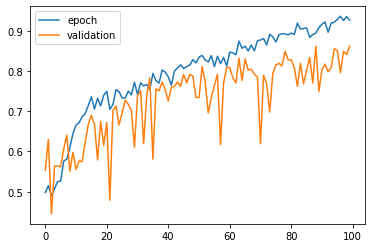

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['epoch', 'validation'], loc = 'upper left')
plt.show()

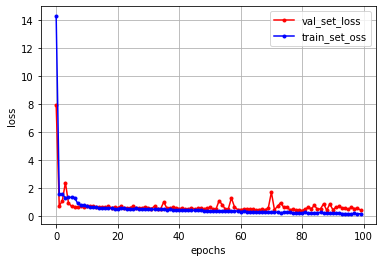

In [12]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

In [15]:
# predict 메서드로 테스트 세트에 대한 예측 결과 확인

CLASSES = np.array(['Man', 'Woman'])

preds = model.predict(X_test) 
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

In [25]:
model.evaluate(X_test, y_test)

15/15 [==============================] - 2s 104ms/step - loss: 0.4114 - accuracy: 0.8617


[0.41143372654914856, 0.8617021441459656]

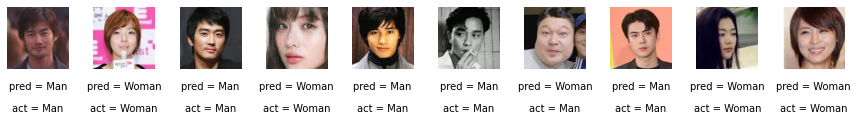

In [24]:
n_to_show = 10
indices = np.random.choice(range(len(X_test)), n_to_show)

fig = plt.figure(figsize = (15, 3))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

for i, idx in enumerate(indices):
  img = X_test[idx] 
  ax = fig.add_subplot(1, n_to_show, i+1)
  ax.axis('off')
  ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize = 10, ha = 'center', transform = ax.transAxes)
  ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize = 10, ha = 'center', transform = ax.transAxes)
  ax.imshow(img)